In [5]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached https://download.pytorch.org/whl/networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached https://download.pytorch.org/whl/mpmath-1.2.1-py3-none-any.whl (532 kB)


In [2]:
from matplotlib import pyplot as plt

In [33]:
BATCH_SIZE = 16
def visualize_batch(batch, classes, dataset_type):
	# initialize a figure
	fig = plt.figure("{} batch".format(dataset_type),
		figsize=(16, 16))
	# loop over the batch size
	for i in range(0, 16):
		# create a subplot
		ax = plt.subplot(4, 4, i + 1)
		# grab the image, convert it from channels first ordering to
		# channels last ordering, and scale the raw pixel intensities
		# to the range [0, 255]
		image = batch[0][i].cpu().numpy()
		image = image.transpose((1, 2, 0))
		image = (image * 255.0).astype("uint8")
		# grab the label id and get the label from the classes list
		idx = batch[1][i]
		label = classes[idx]
		# show the image along with the label
		plt.imshow(image)
		plt.title(label)
		plt.axis("off")
	# show the plot
	plt.tight_layout()
	plt.show()

In [34]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [55]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [56]:
trainDataset = ImageFolder('dataset/train', transform=transform_train)

In [57]:
trainset = DataLoader(trainDataset, batch_size=16)

In [58]:
len(trainset)

15

In [53]:
trainDataset.classes

['cat', 'dog', 'elephant']

[INFO] visualizing training batch...


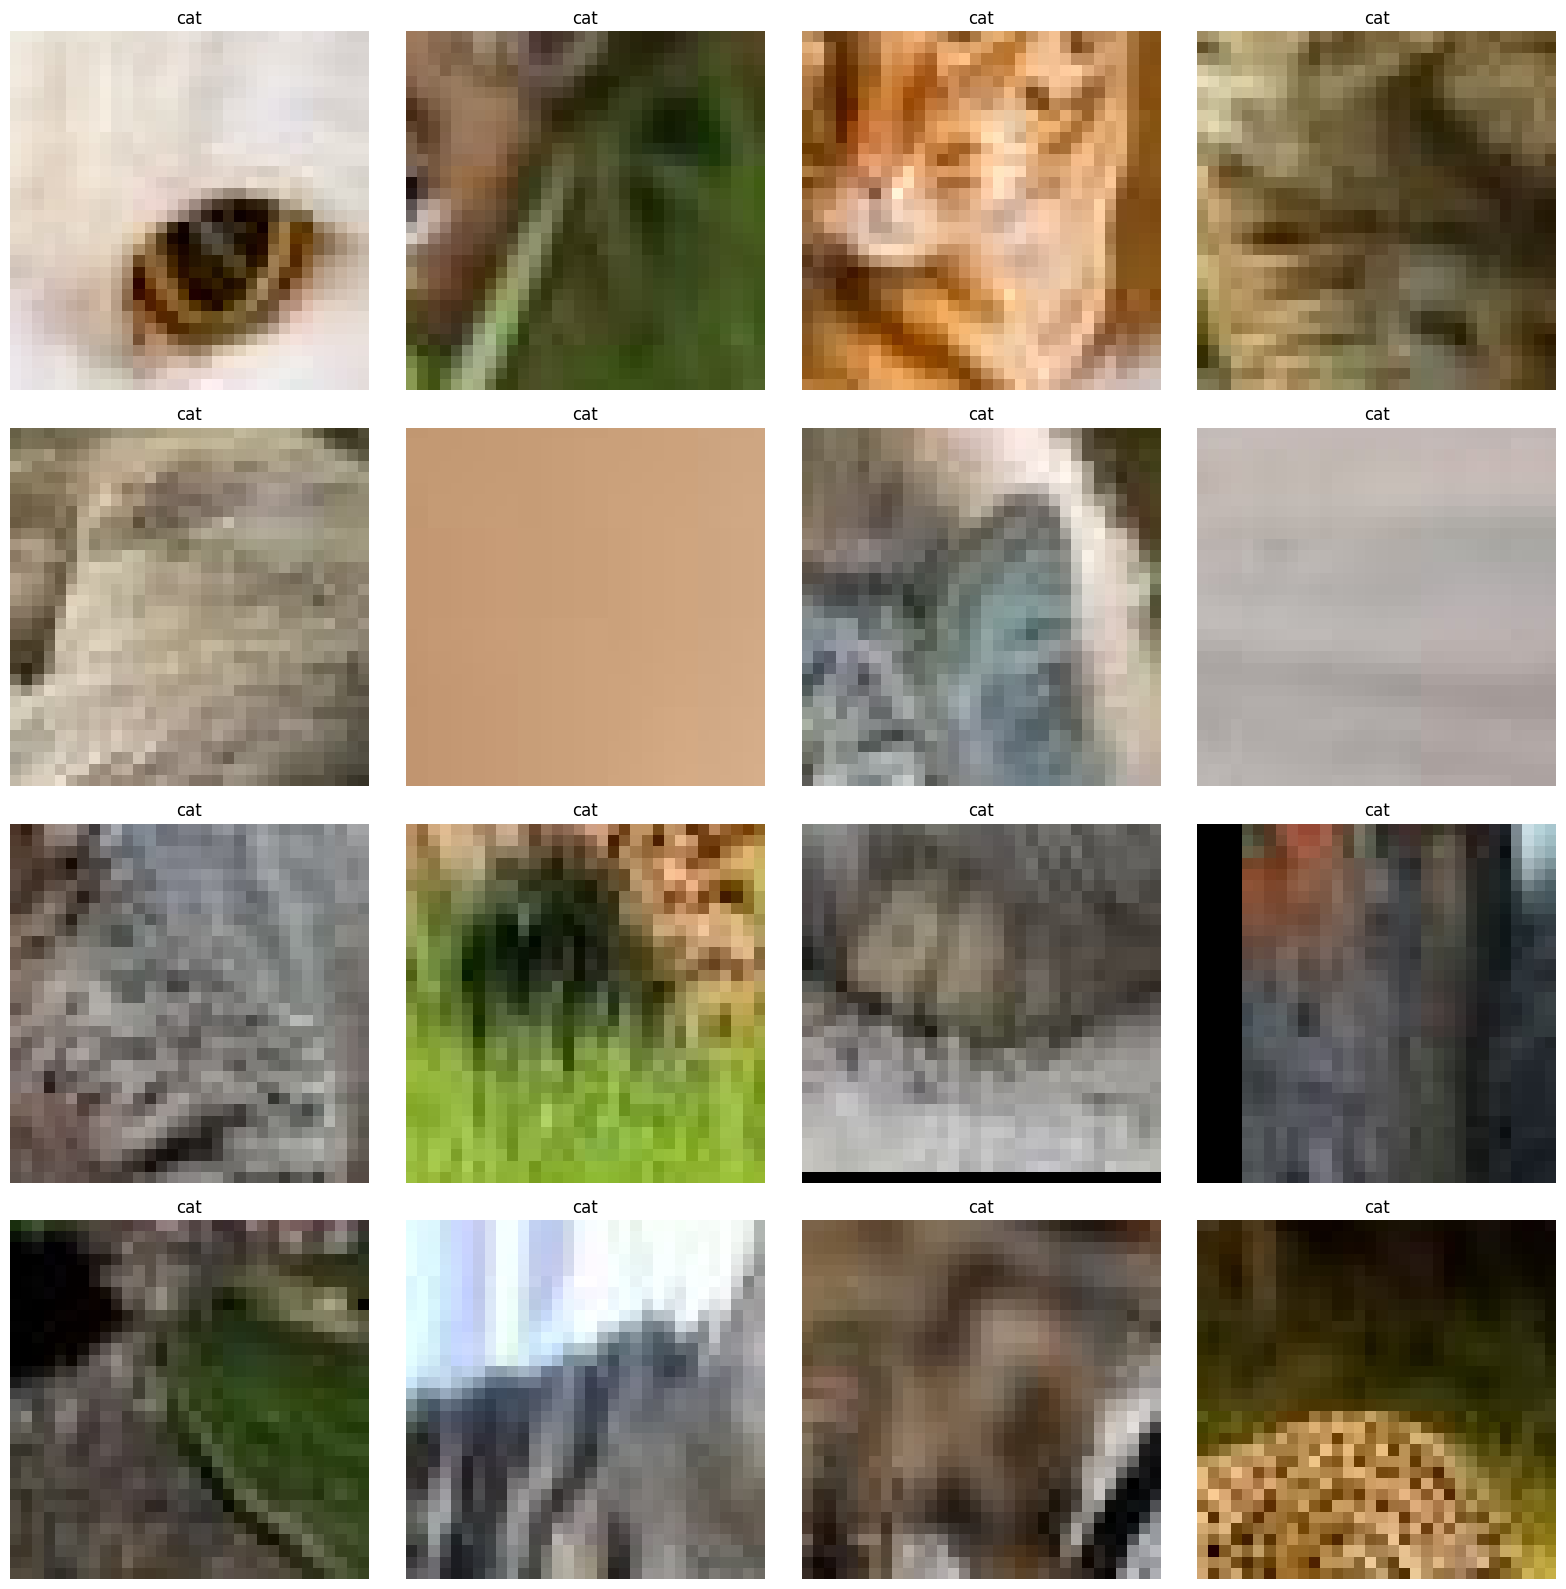

In [54]:
# grab a batch from both training and validation dataloader
trainBatch = next(iter(trainset))
# valBatch = next(iter(valDataLoader))
# visualize the training set batch
print("[INFO] visualizing training batch...")
visualize_batch(trainBatch, trainDataset.classes, "train")